# 1. Initialization

Import packages, initialize Spark session and common variables.

In [59]:
from pyspark.sql import SparkSession, Row
from pyspark.sql.functions import col, lag, avg, date_trunc, lit, expr, explode, to_date
from pyspark.sql.window import Window
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [60]:
# Initialize Spark session
spark = SparkSession.builder.appName("COVID-Analysis").getOrCreate()

# Path to CSV file containing raw dataset
GLOBAL_CONFIRMED_DATASET_PATH="./time_series_covid19_confirmed_global.csv"

DATE_COLUMNS = ["1/22/20","1/23/20","1/24/20","1/25/20","1/26/20","1/27/20","1/28/20","1/29/20","1/30/20","1/31/20","2/1/20","2/2/20","2/3/20","2/4/20","2/5/20","2/6/20","2/7/20","2/8/20","2/9/20","2/10/20","2/11/20","2/12/20","2/13/20","2/14/20","2/15/20","2/16/20","2/17/20","2/18/20","2/19/20","2/20/20","2/21/20","2/22/20","2/23/20","2/24/20","2/25/20","2/26/20","2/27/20","2/28/20","2/29/20","3/1/20","3/2/20","3/3/20","3/4/20","3/5/20","3/6/20","3/7/20","3/8/20","3/9/20","3/10/20","3/11/20","3/12/20","3/13/20","3/14/20","3/15/20","3/16/20","3/17/20","3/18/20","3/19/20","3/20/20","3/21/20","3/22/20","3/23/20","3/24/20","3/25/20","3/26/20","3/27/20","3/28/20","3/29/20","3/30/20","3/31/20","4/1/20","4/2/20","4/3/20","4/4/20","4/5/20","4/6/20","4/7/20","4/8/20","4/9/20","4/10/20","4/11/20","4/12/20","4/13/20","4/14/20","4/15/20","4/16/20","4/17/20","4/18/20","4/19/20","4/20/20","4/21/20","4/22/20","4/23/20","4/24/20","4/25/20","4/26/20","4/27/20","4/28/20","4/29/20","4/30/20","5/1/20","5/2/20","5/3/20","5/4/20","5/5/20","5/6/20","5/7/20","5/8/20","5/9/20","5/10/20","5/11/20","5/12/20","5/13/20","5/14/20","5/15/20","5/16/20","5/17/20","5/18/20","5/19/20","5/20/20","5/21/20","5/22/20","5/23/20","5/24/20","5/25/20","5/26/20","5/27/20","5/28/20","5/29/20","5/30/20","5/31/20","6/1/20","6/2/20","6/3/20","6/4/20","6/5/20","6/6/20","6/7/20","6/8/20","6/9/20","6/10/20","6/11/20","6/12/20","6/13/20","6/14/20","6/15/20","6/16/20","6/17/20","6/18/20","6/19/20","6/20/20","6/21/20","6/22/20","6/23/20","6/24/20","6/25/20","6/26/20","6/27/20","6/28/20","6/29/20","6/30/20","7/1/20","7/2/20","7/3/20","7/4/20","7/5/20","7/6/20","7/7/20","7/8/20","7/9/20","7/10/20","7/11/20","7/12/20","7/13/20","7/14/20","7/15/20","7/16/20","7/17/20","7/18/20","7/19/20","7/20/20","7/21/20","7/22/20","7/23/20","7/24/20","7/25/20","7/26/20","7/27/20","7/28/20","7/29/20","7/30/20","7/31/20","8/1/20","8/2/20","8/3/20","8/4/20","8/5/20","8/6/20","8/7/20","8/8/20","8/9/20","8/10/20","8/11/20","8/12/20","8/13/20","8/14/20","8/15/20","8/16/20","8/17/20","8/18/20","8/19/20","8/20/20","8/21/20","8/22/20","8/23/20","8/24/20","8/25/20","8/26/20","8/27/20","8/28/20","8/29/20","8/30/20","8/31/20","9/1/20","9/2/20","9/3/20","9/4/20","9/5/20","9/6/20","9/7/20","9/8/20","9/9/20","9/10/20","9/11/20","9/12/20","9/13/20","9/14/20","9/15/20","9/16/20","9/17/20","9/18/20","9/19/20","9/20/20","9/21/20","9/22/20","9/23/20","9/24/20","9/25/20","9/26/20","9/27/20","9/28/20","9/29/20","9/30/20","10/1/20","10/2/20","10/3/20","10/4/20","10/5/20","10/6/20","10/7/20","10/8/20","10/9/20","10/10/20","10/11/20","10/12/20","10/13/20","10/14/20","10/15/20","10/16/20","10/17/20","10/18/20","10/19/20","10/20/20","10/21/20","10/22/20","10/23/20","10/24/20","10/25/20","10/26/20","10/27/20","10/28/20","10/29/20","10/30/20","10/31/20","11/1/20","11/2/20","11/3/20","11/4/20","11/5/20","11/6/20","11/7/20","11/8/20","11/9/20","11/10/20","11/11/20","11/12/20","11/13/20","11/14/20","11/15/20","11/16/20","11/17/20","11/18/20","11/19/20","11/20/20","11/21/20","11/22/20","11/23/20","11/24/20","11/25/20","11/26/20","11/27/20","11/28/20","11/29/20","11/30/20","12/1/20","12/2/20","12/3/20","12/4/20","12/5/20","12/6/20","12/7/20","12/8/20","12/9/20","12/10/20","12/11/20","12/12/20","12/13/20","12/14/20","12/15/20","12/16/20","12/17/20","12/18/20","12/19/20","12/20/20","12/21/20","12/22/20","12/23/20","12/24/20","12/25/20","12/26/20","12/27/20","12/28/20","12/29/20","12/30/20","12/31/20","1/1/21","1/2/21","1/3/21","1/4/21","1/5/21","1/6/21","1/7/21","1/8/21","1/9/21","1/10/21","1/11/21","1/12/21","1/13/21","1/14/21","1/15/21","1/16/21","1/17/21","1/18/21","1/19/21","1/20/21","1/21/21","1/22/21","1/23/21","1/24/21","1/25/21","1/26/21","1/27/21","1/28/21","1/29/21","1/30/21","1/31/21","2/1/21","2/2/21","2/3/21","2/4/21","2/5/21","2/6/21","2/7/21","2/8/21","2/9/21","2/10/21","2/11/21","2/12/21","2/13/21","2/14/21","2/15/21","2/16/21","2/17/21","2/18/21","2/19/21","2/20/21","2/21/21","2/22/21","2/23/21","2/24/21","2/25/21","2/26/21","2/27/21","2/28/21","3/1/21","3/2/21","3/3/21","3/4/21","3/5/21","3/6/21","3/7/21","3/8/21","3/9/21","3/10/21","3/11/21","3/12/21","3/13/21","3/14/21","3/15/21","3/16/21","3/17/21","3/18/21","3/19/21","3/20/21","3/21/21","3/22/21","3/23/21","3/24/21","3/25/21","3/26/21","3/27/21","3/28/21","3/29/21","3/30/21","3/31/21","4/1/21","4/2/21","4/3/21","4/4/21","4/5/21","4/6/21","4/7/21","4/8/21","4/9/21","4/10/21","4/11/21","4/12/21","4/13/21","4/14/21","4/15/21","4/16/21","4/17/21","4/18/21","4/19/21","4/20/21","4/21/21","4/22/21","4/23/21","4/24/21","4/25/21","4/26/21","4/27/21","4/28/21","4/29/21","4/30/21","5/1/21","5/2/21","5/3/21","5/4/21","5/5/21","5/6/21","5/7/21","5/8/21","5/9/21","5/10/21","5/11/21","5/12/21","5/13/21","5/14/21","5/15/21","5/16/21","5/17/21","5/18/21","5/19/21","5/20/21","5/21/21","5/22/21","5/23/21","5/24/21","5/25/21","5/26/21","5/27/21","5/28/21","5/29/21","5/30/21","5/31/21","6/1/21","6/2/21","6/3/21","6/4/21","6/5/21","6/6/21","6/7/21","6/8/21","6/9/21","6/10/21","6/11/21","6/12/21","6/13/21","6/14/21","6/15/21","6/16/21","6/17/21","6/18/21","6/19/21","6/20/21","6/21/21","6/22/21","6/23/21","6/24/21","6/25/21","6/26/21","6/27/21","6/28/21","6/29/21","6/30/21","7/1/21","7/2/21","7/3/21","7/4/21","7/5/21","7/6/21","7/7/21","7/8/21","7/9/21","7/10/21","7/11/21","7/12/21","7/13/21","7/14/21","7/15/21","7/16/21","7/17/21","7/18/21","7/19/21","7/20/21","7/21/21","7/22/21","7/23/21","7/24/21","7/25/21","7/26/21","7/27/21","7/28/21","7/29/21","7/30/21","7/31/21","8/1/21","8/2/21","8/3/21","8/4/21","8/5/21","8/6/21","8/7/21","8/8/21","8/9/21","8/10/21","8/11/21","8/12/21","8/13/21","8/14/21","8/15/21","8/16/21","8/17/21","8/18/21","8/19/21","8/20/21","8/21/21","8/22/21","8/23/21","8/24/21","8/25/21","8/26/21","8/27/21","8/28/21","8/29/21","8/30/21","8/31/21","9/1/21","9/2/21","9/3/21","9/4/21","9/5/21","9/6/21","9/7/21","9/8/21","9/9/21","9/10/21","9/11/21","9/12/21","9/13/21","9/14/21","9/15/21","9/16/21","9/17/21","9/18/21","9/19/21","9/20/21","9/21/21","9/22/21","9/23/21","9/24/21","9/25/21","9/26/21","9/27/21","9/28/21","9/29/21","9/30/21","10/1/21","10/2/21","10/3/21","10/4/21","10/5/21","10/6/21","10/7/21","10/8/21","10/9/21","10/10/21","10/11/21","10/12/21","10/13/21","10/14/21","10/15/21","10/16/21","10/17/21","10/18/21","10/19/21","10/20/21","10/21/21","10/22/21","10/23/21","10/24/21","10/25/21","10/26/21","10/27/21","10/28/21","10/29/21","10/30/21","10/31/21","11/1/21","11/2/21","11/3/21","11/4/21","11/5/21","11/6/21","11/7/21","11/8/21","11/9/21","11/10/21","11/11/21","11/12/21","11/13/21","11/14/21","11/15/21","11/16/21","11/17/21","11/18/21","11/19/21","11/20/21","11/21/21","11/22/21","11/23/21","11/24/21","11/25/21","11/26/21","11/27/21","11/28/21","11/29/21","11/30/21","12/1/21","12/2/21","12/3/21","12/4/21","12/5/21","12/6/21","12/7/21","12/8/21","12/9/21","12/10/21","12/11/21","12/12/21","12/13/21","12/14/21","12/15/21","12/16/21","12/17/21","12/18/21","12/19/21","12/20/21","12/21/21","12/22/21","12/23/21","12/24/21","12/25/21","12/26/21","12/27/21","12/28/21","12/29/21","12/30/21","12/31/21","1/1/22","1/2/22","1/3/22","1/4/22","1/5/22","1/6/22","1/7/22","1/8/22","1/9/22","1/10/22","1/11/22","1/12/22","1/13/22","1/14/22","1/15/22","1/16/22","1/17/22","1/18/22","1/19/22","1/20/22","1/21/22","1/22/22","1/23/22","1/24/22","1/25/22","1/26/22","1/27/22","1/28/22","1/29/22","1/30/22","1/31/22","2/1/22","2/2/22","2/3/22","2/4/22","2/5/22","2/6/22","2/7/22","2/8/22","2/9/22","2/10/22","2/11/22","2/12/22","2/13/22","2/14/22","2/15/22","2/16/22","2/17/22","2/18/22","2/19/22","2/20/22","2/21/22","2/22/22","2/23/22","2/24/22","2/25/22","2/26/22","2/27/22","2/28/22","3/1/22","3/2/22","3/3/22","3/4/22","3/5/22","3/6/22","3/7/22","3/8/22","3/9/22","3/10/22","3/11/22","3/12/22","3/13/22","3/14/22","3/15/22","3/16/22","3/17/22","3/18/22","3/19/22","3/20/22","3/21/22","3/22/22","3/23/22","3/24/22","3/25/22","3/26/22","3/27/22","3/28/22","3/29/22","3/30/22","3/31/22","4/1/22","4/2/22","4/3/22","4/4/22","4/5/22","4/6/22","4/7/22","4/8/22","4/9/22","4/10/22","4/11/22","4/12/22","4/13/22","4/14/22","4/15/22","4/16/22","4/17/22","4/18/22","4/19/22","4/20/22","4/21/22","4/22/22","4/23/22","4/24/22","4/25/22","4/26/22","4/27/22","4/28/22","4/29/22","4/30/22","5/1/22","5/2/22","5/3/22","5/4/22","5/5/22","5/6/22","5/7/22","5/8/22","5/9/22","5/10/22","5/11/22","5/12/22","5/13/22","5/14/22","5/15/22","5/16/22","5/17/22","5/18/22","5/19/22","5/20/22","5/21/22","5/22/22","5/23/22","5/24/22","5/25/22","5/26/22","5/27/22","5/28/22","5/29/22","5/30/22","5/31/22","6/1/22","6/2/22","6/3/22","6/4/22","6/5/22","6/6/22","6/7/22","6/8/22","6/9/22","6/10/22","6/11/22","6/12/22","6/13/22","6/14/22","6/15/22","6/16/22","6/17/22","6/18/22","6/19/22","6/20/22","6/21/22","6/22/22","6/23/22","6/24/22","6/25/22","6/26/22","6/27/22","6/28/22","6/29/22","6/30/22","7/1/22","7/2/22","7/3/22","7/4/22","7/5/22","7/6/22","7/7/22","7/8/22","7/9/22","7/10/22","7/11/22","7/12/22","7/13/22","7/14/22","7/15/22","7/16/22","7/17/22","7/18/22","7/19/22","7/20/22","7/21/22","7/22/22","7/23/22","7/24/22","7/25/22","7/26/22","7/27/22","7/28/22","7/29/22","7/30/22","7/31/22","8/1/22","8/2/22","8/3/22","8/4/22","8/5/22","8/6/22","8/7/22","8/8/22","8/9/22","8/10/22","8/11/22","8/12/22","8/13/22","8/14/22","8/15/22","8/16/22","8/17/22","8/18/22","8/19/22","8/20/22","8/21/22","8/22/22","8/23/22","8/24/22","8/25/22","8/26/22","8/27/22","8/28/22","8/29/22","8/30/22","8/31/22","9/1/22","9/2/22","9/3/22","9/4/22","9/5/22","9/6/22","9/7/22","9/8/22","9/9/22","9/10/22","9/11/22","9/12/22","9/13/22","9/14/22","9/15/22","9/16/22","9/17/22","9/18/22","9/19/22","9/20/22","9/21/22","9/22/22","9/23/22","9/24/22","9/25/22","9/26/22","9/27/22","9/28/22","9/29/22","9/30/22","10/1/22","10/2/22","10/3/22","10/4/22","10/5/22","10/6/22","10/7/22","10/8/22","10/9/22","10/10/22","10/11/22","10/12/22","10/13/22","10/14/22","10/15/22","10/16/22","10/17/22","10/18/22","10/19/22","10/20/22","10/21/22","10/22/22","10/23/22","10/24/22","10/25/22","10/26/22","10/27/22","10/28/22","10/29/22","10/30/22","10/31/22","11/1/22","11/2/22","11/3/22","11/4/22","11/5/22","11/6/22","11/7/22","11/8/22","11/9/22","11/10/22","11/11/22","11/12/22","11/13/22","11/14/22","11/15/22","11/16/22","11/17/22","11/18/22","11/19/22","11/20/22","11/21/22","11/22/22","11/23/22","11/24/22","11/25/22","11/26/22","11/27/22","11/28/22","11/29/22","11/30/22","12/1/22","12/2/22","12/3/22","12/4/22","12/5/22","12/6/22","12/7/22","12/8/22","12/9/22","12/10/22","12/11/22","12/12/22","12/13/22","12/14/22","12/15/22","12/16/22","12/17/22","12/18/22","12/19/22","12/20/22","12/21/22","12/22/22","12/23/22","12/24/22","12/25/22","12/26/22","12/27/22","12/28/22","12/29/22","12/30/22","12/31/22","1/1/23","1/2/23","1/3/23","1/4/23","1/5/23","1/6/23","1/7/23","1/8/23","1/9/23","1/10/23","1/11/23","1/12/23","1/13/23","1/14/23","1/15/23","1/16/23","1/17/23","1/18/23","1/19/23","1/20/23","1/21/23","1/22/23","1/23/23","1/24/23","1/25/23","1/26/23","1/27/23","1/28/23","1/29/23","1/30/23","1/31/23","2/1/23","2/2/23","2/3/23","2/4/23","2/5/23","2/6/23","2/7/23","2/8/23","2/9/23","2/10/23","2/11/23","2/12/23","2/13/23","2/14/23","2/15/23","2/16/23","2/17/23","2/18/23","2/19/23","2/20/23","2/21/23","2/22/23","2/23/23","2/24/23","2/25/23","2/26/23","2/27/23","2/28/23","3/1/23","3/2/23","3/3/23","3/4/23","3/5/23","3/6/23","3/7/23","3/8/23","3/9/23"]

# 2. Create DataFrame from raw data

The cell below will create a [Spark DataFrame](https://spark.apache.org/docs/latest/sql-programming-guide.html#datasets-and-dataframes) from the raw data contained in the CSV file. It holds data about daily cases of COVID 19 in 289 different locations, from January 22nd 2020 to March 9th 2023.

In [61]:
covid_df = spark.read.option("header", "true").csv(GLOBAL_CONFIRMED_DATASET_PATH)
covid_df = covid_df.withColumnRenamed("Country/Region", "location")

In [ ]:
### Show first 30 rows in the DataFrame
covid_df.show(5)

# 3. Manipulating the DataFrame

Before we can manipulate the data as we want, we'll remodel the DataFrame a bit. The raw dataset has columns representing the dates when the daily cases of COVID 19 were observed, and each row the location.

We'll perform a "unpivot" operation, where the date columns will be converted to rows, and we'll unify the dates in a new column called "date", and the cases observed in the dates in another column called "total_cases". The function `unpivot_dataframe` does this operation. To represent it graphically:

- Before:
```
+-----------+----------+----------+----------+-----+---------+
| location  |  1/22/20 |  1/23/20 |  1/24/20 | ... |  3/9/23 |
+-----------+----------+----------+----------+-----+---------+
|Afghanistan|    0     |    0     |    3     | ... |   150   |
|Albania    |    1     |    2     |    5     | ... |   67    |
|Algeria    |    0     |    2     |    2     | ... |   253   |
+-----------+----------+----------+----------+-----+---------+
```
- After:
```
+-----------+-------------+--------------+
| location  |  date       |  total_cases |
+-----------+-------------+--------------+
|Afghanistan|   1/22/20   |    0         |
|Afghanistan|   1/23/20   |    0         |
|Afghanistan|   1/24/20   |    3         |
|   ...     |    ...      |     ...      |
|Afghanistan|   3/9/23    |    150       |
|Albania    |   1/22/20   |    1         |
|Albania    |   1/23/20   |    2         |
|Albania    |   1/24/20   |    5         |
|   ...     |    ...      |     ...      |
|Albania    |   3/9/23    |    67        |
|Algeria    |   1/22/20   |    0         |
|Algeria    |   1/23/20   |    2         |
|Algeria    |   1/24/20   |    2         |
|   ...     |    ...      |     ...      |
|Algeria    |   3/9/23    |    253       |
+-----------+----------+-----------------+
```

In [63]:
def unpivot_dataframe(df, id_column, value_columns):
    # A new column called "unpivoted" is created; it's an array of structure in the format of tuples, where the first element
    # is the date, and the second element is the number of cases observed on that date.
    unpivot_expr = "array(" + ", ".join(
        [f"struct('{col}' as date, `{col}` as total_cases)" for col in value_columns]
    ) + ") as unpivoted"

    # Step 1: Create an intermediate DataFrame with the "unpivoted" column
    df_with_array = df.withColumn("unpivoted", expr(unpivot_expr))

    # Step 2: Explode the array contained in the "unpivoted" column to create multiple rows. Two columns for each row will be created:
    # date and total_cases.
    df_unpivoted = df_with_array.selectExpr(f"{id_column}", "explode(unpivoted) as data").selectExpr(
        f"{id_column}", "data.date as date", "data.total_cases as total_cases"
    )
    
    return df_unpivoted

In [64]:
covid_df_transformed = unpivot_dataframe(covid_df, "location", DATE_COLUMNS)

Showing the resulting DataFrame

In [65]:
covid_df_transformed.show()

+-----------+-------+-----------+
|   location|   date|total_cases|
+-----------+-------+-----------+
|Afghanistan|1/22/20|          0|
|Afghanistan|1/23/20|          0|
|Afghanistan|1/24/20|          0|
|Afghanistan|1/25/20|          0|
|Afghanistan|1/26/20|          0|
|Afghanistan|1/27/20|          0|
|Afghanistan|1/28/20|          0|
|Afghanistan|1/29/20|          0|
|Afghanistan|1/30/20|          0|
|Afghanistan|1/31/20|          0|
|Afghanistan| 2/1/20|          0|
|Afghanistan| 2/2/20|          0|
|Afghanistan| 2/3/20|          0|
|Afghanistan| 2/4/20|          0|
|Afghanistan| 2/5/20|          0|
|Afghanistan| 2/6/20|          0|
|Afghanistan| 2/7/20|          0|
|Afghanistan| 2/8/20|          0|
|Afghanistan| 2/9/20|          0|
|Afghanistan|2/10/20|          0|
+-----------+-------+-----------+
only showing top 20 rows



## 3.1 Casting resulting columns

After unpivoting our DataFrame, we'll cast the column types from string to the desired data type - Date for the column "date", Integer for column "total_cases"

In [66]:
# Print DataFrame schema before casting - you should see all columns with type String.
print(f"Before casting, schema is: \n{covid_df_transformed.schema}\n")

# Cast columns
covid_df_transformed = covid_df_transformed.withColumn("date", to_date(covid_df_transformed["date"],"M/d/yy")) \
                                           .withColumn("total_cases", col("total_cases").cast("int"))

# Print DataFrame schema after casting - you should see all columns with the intended data type.
print(f"After casting, schema is: \n{covid_df_transformed.schema}\n")

# Show DataFrame
covid_df_transformed.show()

Before casting, schema is: 
StructType([StructField('location', StringType(), True), StructField('date', StringType(), False), StructField('total_cases', StringType(), True)])

After casting, schema is: 
StructType([StructField('location', StringType(), True), StructField('date', DateType(), True), StructField('total_cases', IntegerType(), True)])

+-----------+----------+-----------+
|   location|      date|total_cases|
+-----------+----------+-----------+
|Afghanistan|2020-01-22|          0|
|Afghanistan|2020-01-23|          0|
|Afghanistan|2020-01-24|          0|
|Afghanistan|2020-01-25|          0|
|Afghanistan|2020-01-26|          0|
|Afghanistan|2020-01-27|          0|
|Afghanistan|2020-01-28|          0|
|Afghanistan|2020-01-29|          0|
|Afghanistan|2020-01-30|          0|
|Afghanistan|2020-01-31|          0|
|Afghanistan|2020-02-01|          0|
|Afghanistan|2020-02-02|          0|
|Afghanistan|2020-02-03|          0|
|Afghanistan|2020-02-04|          0|
|Afghanistan|2020-02

# 4. Drawing insights from data

Now that our DataFrame has the desired format, we'll start manipulating the data contained in it.

## 4.1 Calculating daily new cases

We'll make use of the [Window](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.Window.html#pyspark-sql-window) class in Spark to partition our data by location and calculate the observed daily new cases.

In [67]:
# Calculate daily new cases
window_spec = Window.partitionBy("location").orderBy("location")

# Create new column "daily_new_cases" containing the difference of cases observed between today and yesterday.
covid_df_transformed = covid_df_transformed \
    .withColumn("daily_new_cases", col("total_cases") - lag(col("total_cases"), 1).over(window_spec)) \
    .withColumn("date", col("date")) \
    .withColumn("total_cases", col("total_cases")) \
    .withColumn("location", col("location"))

# Show DataFrame
covid_df_transformed.show(50)

+-----------+----------+-----------+---------------+
|   location|      date|total_cases|daily_new_cases|
+-----------+----------+-----------+---------------+
|Afghanistan|2020-01-22|          0|           NULL|
|Afghanistan|2020-01-23|          0|              0|
|Afghanistan|2020-01-24|          0|              0|
|Afghanistan|2020-01-25|          0|              0|
|Afghanistan|2020-01-26|          0|              0|
|Afghanistan|2020-01-27|          0|              0|
|Afghanistan|2020-01-28|          0|              0|
|Afghanistan|2020-01-29|          0|              0|
|Afghanistan|2020-01-30|          0|              0|
|Afghanistan|2020-01-31|          0|              0|
|Afghanistan|2020-02-01|          0|              0|
|Afghanistan|2020-02-02|          0|              0|
|Afghanistan|2020-02-03|          0|              0|
|Afghanistan|2020-02-04|          0|              0|
|Afghanistan|2020-02-05|          0|              0|
|Afghanistan|2020-02-06|          0|          

## 4.2 Calculate weekly moving average of new cases

Another useful insight is the 7-day moving average of new cases - it helps us capture trends in the evolution of cases in each location.

In [68]:
# Add new column containing the 7-day moving average of new cases.
covid_df_transformed = covid_df_transformed.withColumn("7_day_avg", avg("daily_new_cases").over(window_spec.rowsBetween(-6, 0)))

# Show DataFrame
covid_df_transformed.show(50)

+-----------+----------+-----------+---------------+-------------------+
|   location|      date|total_cases|daily_new_cases|          7_day_avg|
+-----------+----------+-----------+---------------+-------------------+
|Afghanistan|2020-01-22|          0|           NULL|               NULL|
|Afghanistan|2020-01-23|          0|              0|                0.0|
|Afghanistan|2020-01-24|          0|              0|                0.0|
|Afghanistan|2020-01-25|          0|              0|                0.0|
|Afghanistan|2020-01-26|          0|              0|                0.0|
|Afghanistan|2020-01-27|          0|              0|                0.0|
|Afghanistan|2020-01-28|          0|              0|                0.0|
|Afghanistan|2020-01-29|          0|              0|                0.0|
|Afghanistan|2020-01-30|          0|              0|                0.0|
|Afghanistan|2020-01-31|          0|              0|                0.0|
|Afghanistan|2020-02-01|          0|              0

## 4.3 Calculate weekly new cases

Grouping the new cases observed in each week also helps us visualizing how fast the COVID 19 cases have spread in each location.

This time, we'll create a new DataFrame called `weekly_df` with this information.

In [69]:
# We'll use the date_trunc Spark function to extract the week from each date in the DataFrame.
covid_df_transformed = covid_df_transformed.withColumn("week", date_trunc("week", col("date")))

# Show DataFrame
covid_df_transformed.show(50)

# New DataFrame "weekly_df" will contain the weekly cases for each location. The "group_by" function is used to partition the DataFrame
# by "location" and "week", and sum the daily new cases in all days of each week.
weekly_df = covid_df_transformed.groupBy("location","week").sum("daily_new_cases").withColumnRenamed("sum(daily_new_cases)", "weekly_new_cases")

# Show the result
weekly_df.show(50)

+-----------+----------+-----------+---------------+-------------------+-------------------+
|   location|      date|total_cases|daily_new_cases|          7_day_avg|               week|
+-----------+----------+-----------+---------------+-------------------+-------------------+
|Afghanistan|2020-01-22|          0|           NULL|               NULL|2020-01-20 00:00:00|
|Afghanistan|2020-01-23|          0|              0|                0.0|2020-01-20 00:00:00|
|Afghanistan|2020-01-24|          0|              0|                0.0|2020-01-20 00:00:00|
|Afghanistan|2020-01-25|          0|              0|                0.0|2020-01-20 00:00:00|
|Afghanistan|2020-01-26|          0|              0|                0.0|2020-01-20 00:00:00|
|Afghanistan|2020-01-27|          0|              0|                0.0|2020-01-27 00:00:00|
|Afghanistan|2020-01-28|          0|              0|                0.0|2020-01-27 00:00:00|
|Afghanistan|2020-01-29|          0|              0|                0.

# 5. Visualizing the data

Plotting the data will help us check the progression of COVID 19 cases. We'll use the contents of the DataFrame `weekly_df` that we previously manipulated to visually see how the cases evolved each week in the observed time window.

In the cell below, we'll make use of the `pandas`, `seaborn` and `matplotlib` libraries to compose a graph of weekly new cases.


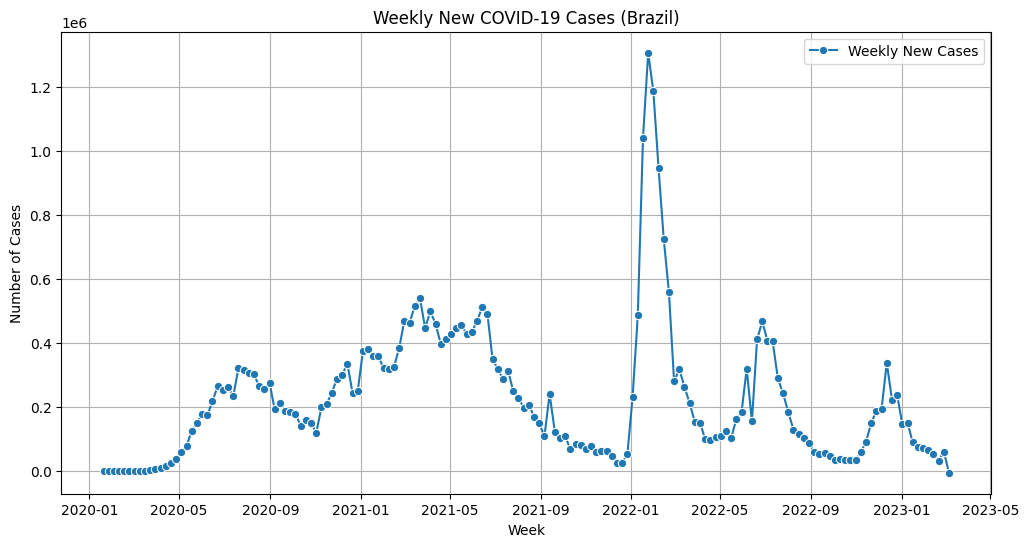

In [76]:
# Convert to Pandas
weekly_cases_pd = weekly_df.toPandas().sort_values(by=["location", "week"])

# Filter data for a specific country (e.g., Brazil)
country_data = weekly_cases_pd[weekly_cases_pd["location"] == "Brazil"]

# Plot weekly new cases
plt.figure(figsize=(12, 6))
sns.lineplot(data=country_data, x="week", y="weekly_new_cases", label="Weekly New Cases", marker="o")

# Add labels, legend, and title
plt.xlabel("Week")
plt.ylabel("Number of Cases")
plt.title("Weekly New COVID-19 Cases (Brazil)")
plt.legend()
plt.grid()
plt.show()